# Hw3
## Alejandro Moscoso 332336908
## Shiraz benyatov 313592958

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
from sklearn import decomposition



In [36]:
sonar= pd.read_csv('sonar.all-data',header=None)
sonar_names = sonar.iloc[:,-1]
sonar_data = sonar.iloc[:,0:-1]

If we sum the total sum varians we can see that after 16 eig vectors we have more than 95% porcent of the variance


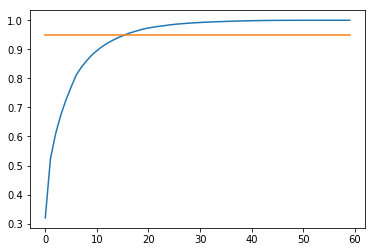

In [152]:
eig_vals, eig_vect = np.linalg.eig(sonar_data.cov())


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vect[:,i]) for i in range(len(eig_vals))]

# Do we need to perform np.abs()???

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

confi95 =np.where(cum_var_exp>0.95)[0][0]

print( f'If we sum the total sum varians we can see that after {confi95} eig vectors we have more than 95% porcent of the variance')

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) #Calculate cummulative value
plt.plot(cum_var_exp) 
plt.plot([0.95 for i in range(len(cum_var_exp))])
plt.show()



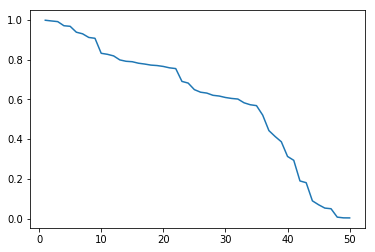

In [151]:
eig_vect_order=pd.DataFrame([eig_pairs[i][1] for i in range(len(eig_pairs))])
results= dict ( 
    number_eig = [],
    error =[],
)
for i in range(50,0,-1):
    
    W = eig_vect_order.iloc[:,0:i]
    diff = (np.linalg.pinv(W).T.dot(W.T.dot(sonar_data.T)).T - sonar_data)
    error = np.square(np.linalg.norm(diff, ord ='fro')/(np.linalg.norm(sonar_data,ord ='fro')))
    results['number_eig'].append(i)
    results['error'].append(error)
    
plt.figure()
plt.plot(results['number_eig'],results['error'])
plt.show()

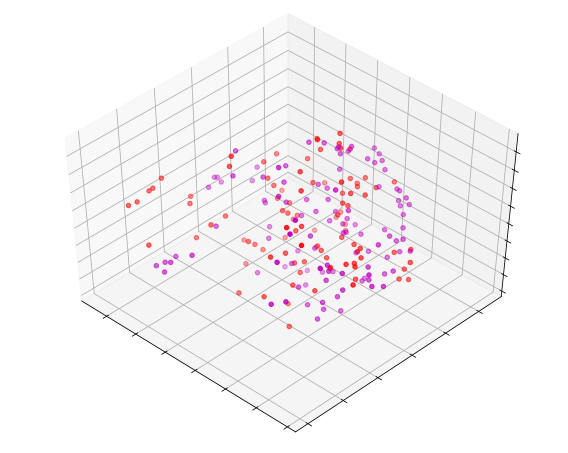

In [153]:
# we use 3 the best 3 Axis for better representation 
pca = decomposition.PCA(n_components=3) # creating a PCA object
pca.fit(sonar_data)
sonar_pc0_pc1_pc2 = pca.transform(sonar_data)
X3=sonar_pc0_pc1_pc2
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# for name, label in [('Mine', 0), ('Rock', 1)]:
#     ax.text3D(X3[y == label, 0].mean(),
#               X3[y == label, 1].mean() ,
              
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
# y_number = np.choose(sonar_names, [0,1]) #.astype(np.float)
ax.scatter(X3[:,0], X3[:, 1], X3[:, 2], c=sonar_names, cmap=plt.cm.spectral)




ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


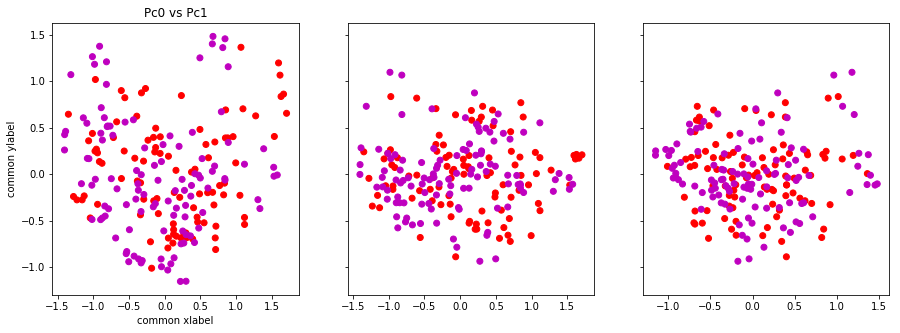

In [154]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5))

ax1.scatter(X3[:,0], X3[:,1], c=sonar_names)
ax2.scatter(X3[:,0], X3[:,2], c=sonar_names)
ax3.scatter(X3[:,1], X3[:,2], c=sonar_names)
ax1.set_xlabel('common xlabel')
ax1.set_ylabel('common ylabel')
ax1.set_title('Pc0 vs Pc1')
plt.show()